<a href="https://colab.research.google.com/github/yisi22/Real-Estate-Investment/blob/main/Office_Building_Strata_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import find_peaks
from datetime import datetime
import math
from functools import reduce

In [3]:
data = pd.read_excel("/content/Project Throne - RFI (MBK) 310723.xlsx", sheet_name= 'Tab 1 Downtown Core')

In [4]:
data.columns

Index(['Project Name', 'Transacted Price ($)', 'Area (SQFT)',
       'Unit Price ($ PSF)', 'Sale Date', 'Address', 'Type of Sale',
       'Type of Area', 'Area (SQM)', 'Unit Price ($ PSM)', 'Property Type',
       'Tenure', 'Postal District', 'Postal Sector', 'Postal Code',
       'Planning Region', 'Planning Area'],
      dtype='object')

In [5]:
# Convert the 'timestamp_column' to a pandas datetime object
data['Sale Date'] = pd.to_datetime(data['Sale Date'])

# Create a new column with year-month using the 'dt' accessor
data['Sale Month'] = data['Sale Date'].dt.to_period('M')

In [6]:
data

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),Property Type,Tenure,Postal District,Postal Sector,Postal Code,Planning Region,Planning Area,Sale Month
0,INTERNATIONAL PLAZA,1731600,936.47,1849,2023-07-06,10 ANSON ROAD #21-01,Resale,Strata,87.0,19903,Office,99 yrs from 02/06/1970,2,7,79903.0,Central Region,Downtown Core,2023-07
1,SUNTEC CITY,16518150,7028.89,2350,2023-07-06,9 TEMASEK BOULEVARD #06-02,Resale,Strata,653.0,25296,Office,99 yrs from 01/03/1989,1,3,38989.0,Central Region,Downtown Core,2023-07
2,SOLITAIRE ON CECIL,51184000,12464.71,4106,2023-07-04,148 CECIL STREET #10-01 TO 08,New Sale,Strata,1158.0,44200,Office,Freehold,1,6,69974.0,Central Region,Downtown Core,2023-07
3,SOLITAIRE ON CECIL,52054000,12464.71,4176,2023-07-04,148 CECIL STREET #14-01 TO 08,New Sale,Strata,1158.0,44952,Office,Freehold,1,6,69974.0,Central Region,Downtown Core,2023-07
4,SUNTEC CITY,11502600,4036.50,2850,2023-07-03,7 TEMASEK BOULEVARD #08-02,Resale,Strata,375.0,30674,Office,99 yrs from 01/03/1989,1,3,38987.0,Central Region,Downtown Core,2023-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,PENINSULA PLAZA,1707750,1485.43,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-02,Resale,Strata,138.0,12375,Office,999 yrs from 29/10/1829,6,17,179098.0,Central Region,Downtown Core,2000-09
2683,PENINSULA PLAZA,3193678,2777.11,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-03,Resale,Strata,258.0,12379,Office,999 yrs from 29/10/1829,6,17,179098.0,Central Region,Downtown Core,2000-09
2684,SHENTON HOUSE,730000,947.23,771,2000-08-28,3 SHENTON WAY #08-04,Resale,Strata,88.0,8295,Office,99 yrs from 02/06/1969,1,6,68805.0,Central Region,Downtown Core,2000-08
2685,SUNTEC CITY,5457348,3498.30,1560,2000-08-01,8 TEMASEK BOULEVARD #22-03/04/05,Resale,Strata,325.0,16792,Office,99 yrs from 01/03/1989,1,3,38988.0,Central Region,Downtown Core,2000-08


## Calculate Time Series Data

In [7]:
data_TimeSeries = data.groupby(['Sale Month', 'Postal Code']).mean()

<ipython-input-7-004f45bc8dad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_TimeSeries = data.groupby(['Sale Month', 'Postal Code']).mean()


In [8]:
data_TimeSeries = data_TimeSeries['Unit Price ($ PSF)'].reset_index()

In [9]:
data_TimeSeries

,Sale Month,Postal Code,Unit Price ($ PSF)
0,2000-07,69534.0,1096.0
1,2000-08,38988.0,1560.0
2,2000-08,68805.0,771.0
3,2000-09,69534.0,930.0
4,2000-09,79025.0,831.0
...,...,...,...
1347,2023-06,199591.0,1942.5
1348,2023-07,38987.0,2850.0
1349,2023-07,38989.0,2350.0
1350,2023-07,69974.0,4141.0


In [10]:
Significant_Properties = data_TimeSeries['Postal Code'].value_counts().nlargest(5).index
Significant_Properties_TransactionNumber = data_TimeSeries['Postal Code'].value_counts().nlargest(5)

In [11]:
Significant_Properties_TransactionNumber

79903.0     209
179094.0    123
179098.0     97
68805.0      92
179433.0     91
Name: Postal Code, dtype: int64

In [12]:
# Fourier Transform
def Fourier_Transform (first_property):
    prices = first_property['Unit Price ($ PSF)'].to_numpy()
    fft_price = fft(prices)
    N = len(prices)
    T = 1.0
    fft_freq = np.fft.fftfreq(N,T)
    positive_frquencies = fft_freq[:N//2]
    positvie_fft_values = 2.0/N * np.abs(fft_price[0:N//2])
    amplitude_threshold = 0.1
    significant_peaks, _ = find_peaks(positvie_fft_values, height=amplitude_threshold)
    significant_frequencies = positive_frquencies[significant_peaks]
    significant_amplitudes = positvie_fft_values[significant_peaks]
    days_per_cycle = 1/ significant_frequencies
    fft_features = pd.DataFrame({'Frequency' : significant_frequencies,
                                 'Amplitude' : significant_amplitudes,
                                 'MonthsPerCycle' : days_per_cycle.astype(int)})
    return fft_features

In [13]:
significance = 6 # number of periods considered as one circle

# Find the Significant Cycles
Cycle_range = []
for i in range(5):
    first_property = data_TimeSeries[data_TimeSeries['Postal Code'] == Significant_Properties[i]]
    first_property = first_property.drop(columns = 'Postal Code')
    first_property = first_property.set_index('Sale Month')
    fft_1st = Fourier_Transform(first_property)
    cycles = list(fft_1st['MonthsPerCycle'][:5].values)
    Cycle_range.append(cycles)

# COnsider the frictions
Cycle_range = np.array(Cycle_range)
Cycle_range_1 = Cycle_range +1
# Cycle_range_2 = Cycle_range +2
Cycle_range_3 = Cycle_range -1
# Cycle_range_4 = Cycle_range -2

Cycle_range = Cycle_range.flatten()
Cycle_range_1 = Cycle_range_1.flatten()
# Cycle_range_2 = Cycle_range_2.flatten()
Cycle_range_3 = Cycle_range_3.flatten()
# Cycle_range_4 = Cycle_range_4.flatten()

Cycle_range_l = list(Cycle_range)
Cycle_range_l1 = list(Cycle_range_1)
Cycle_range_l3 = list(Cycle_range_3)

#Find the significant cycles
Cycle_Significant = Cycle_range_l + Cycle_range_l1  + Cycle_range_l3 # + Cycle_range_l4 + Cycle_range_l2
C = pd.Series(Cycle_Significant)
Significant_Cycles = C.value_counts().nlargest(10).index
Significant_Cycles = [value for value in Significant_Cycles if value > significance]
Significant_Cycles = np.array(Significant_Cycles) //2

In [14]:
Significant_Cycles

array([5, 4, 3, 7, 6, 4, 5, 7])

In [15]:
# Find the Trough and Peaks
peaks, _ = find_peaks(data_TimeSeries['Unit Price ($ PSF)'], distance = significance, prominence = 2000)
data_TimeSeries['Peak_Trough'] = 0
data_TimeSeries.loc[peaks, 'Peak_Trough'] = 1
through, _ = find_peaks(-data_TimeSeries['Unit Price ($ PSF)'], distance = significance, prominence = 2000)
data_TimeSeries.loc[through, 'Peak_Trough'] = -1

In [16]:
# Calculate the days since peak
data_TimeSeries['Sale Dates'] = data_TimeSeries['Sale Month'].dt.to_timestamp()
data_TimeSeries['MonthsSincePeak'] = 0
data_TimeSeries['MonthsSinceTrough'] = 0
data_TimeSeries['PriceChangeSincePeak'] = 0
data_TimeSeries['PriceChangeSinceTrough'] = 0

checkpoint_date_bottom = None
checkpoint_date_peak = None
checkpoint_price_bottom = None
checkpoint_price_peak = None
price_change_since_bottom = 0
price_change_since_peak = 0

for index, row in data_TimeSeries.iterrows():
    current_price = row['Unit Price ($ PSF)']
    today_date = row['Sale Dates']

    if row['Peak_Trough'] == 1:
        checkpoint_date_peak = today_date
        checkpoint_price_peak = current_price
    if row['Peak_Trough'] == -1:
        checkpoint_date_bottom = today_date
        checkpoint_price_bottom = current_price

    months_since_bottoms = (today_date - checkpoint_date_bottom).days//30 if checkpoint_date_bottom else 0
    months_since_peaks = (today_date - checkpoint_date_peak).days//30 if checkpoint_date_peak else 0

    if checkpoint_price_bottom is not None:
        price_change_since_bottom = current_price - checkpoint_price_bottom
    if checkpoint_price_peak is not None:
        price_change_since_peak = current_price - checkpoint_price_peak
    data_TimeSeries.at[index, 'MonthsSincePeak'] = months_since_peaks
    data_TimeSeries.at[index, 'MonthsSinceTrough'] = months_since_bottoms
    data_TimeSeries.at[index, 'PriceChangeSincePeak'] = price_change_since_peak
    data_TimeSeries.at[index, 'PriceChangeSinceTrough'] = price_change_since_bottom

In [17]:
# detect fourier signals
data_TimeSeries['Fourier_BuySignal'] = data_TimeSeries['MonthsSinceTrough'].isin(Significant_Cycles)
data_TimeSeries['Fourier_SellSignal'] = data_TimeSeries['MonthsSincePeak'].isin(Significant_Cycles)

In [18]:
data_T = data_TimeSeries.drop(columns = ['Unit Price ($ PSF)', 'Sale Dates'])

In [19]:
data_T

,Sale Month,Postal Code,Peak_Trough,MonthsSincePeak,MonthsSinceTrough,PriceChangeSincePeak,PriceChangeSinceTrough,Fourier_BuySignal,Fourier_SellSignal
0,2000-07,69534.0,0,0,0,0.0,0.0,False,False
1,2000-08,38988.0,0,0,0,0.0,0.0,False,False
2,2000-08,68805.0,0,0,0,0.0,0.0,False,False
3,2000-09,69534.0,0,0,0,0.0,0.0,False,False
4,2000-09,79025.0,0,0,0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...
1347,2023-06,199591.0,0,1,0,-2337.5,42.5,False,False
1348,2023-07,38987.0,0,2,1,-1430.0,950.0,False,False
1349,2023-07,38989.0,0,2,1,-1930.0,450.0,False,False
1350,2023-07,69974.0,1,0,1,0.0,2241.0,False,False


## Feature Engineering of Idiosyncratic Data

In [20]:
data = data.drop(columns = ['Project Name', 'Transacted Price ($)', 'Area (SQFT)', 'Type of Sale', 'Type of Area', 'Area (SQM)', 'Unit Price ($ PSM)', 'Property Type', 'Postal District', 'Planning Region', 'Planning Area'])
data

,Unit Price ($ PSF),Sale Date,Address,Tenure,Postal Sector,Postal Code,Sale Month
0,1849,2023-07-06,10 ANSON ROAD #21-01,99 yrs from 02/06/1970,7,79903.0,2023-07
1,2350,2023-07-06,9 TEMASEK BOULEVARD #06-02,99 yrs from 01/03/1989,3,38989.0,2023-07
2,4106,2023-07-04,148 CECIL STREET #10-01 TO 08,Freehold,6,69974.0,2023-07
3,4176,2023-07-04,148 CECIL STREET #14-01 TO 08,Freehold,6,69974.0,2023-07
4,2850,2023-07-03,7 TEMASEK BOULEVARD #08-02,99 yrs from 01/03/1989,3,38987.0,2023-07
...,...,...,...,...,...,...,...
2682,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-02,999 yrs from 29/10/1829,17,179098.0,2000-09
2683,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-03,999 yrs from 29/10/1829,17,179098.0,2000-09
2684,771,2000-08-28,3 SHENTON WAY #08-04,99 yrs from 02/06/1969,6,68805.0,2000-08
2685,1560,2000-08-01,8 TEMASEK BOULEVARD #22-03/04/05,99 yrs from 01/03/1989,3,38988.0,2000-08


In [21]:
data['Intermedia'] = data['Address'].str.split('#', expand = True)[1]
data['Level'] = data['Intermedia'].str.split('-', expand = True)[0]
data['Tenure'].replace({'Freehold': '1/1/1900', '999 yrs': '1/1/1900'}, inplace = True)

In [22]:
data

,Unit Price ($ PSF),Sale Date,Address,Tenure,Postal Sector,Postal Code,Sale Month,Intermedia,Level
0,1849,2023-07-06,10 ANSON ROAD #21-01,99 yrs from 02/06/1970,7,79903.0,2023-07,21-01,21
1,2350,2023-07-06,9 TEMASEK BOULEVARD #06-02,99 yrs from 01/03/1989,3,38989.0,2023-07,06-02,06
2,4106,2023-07-04,148 CECIL STREET #10-01 TO 08,1/1/1900,6,69974.0,2023-07,10-01 TO 08,10
3,4176,2023-07-04,148 CECIL STREET #14-01 TO 08,1/1/1900,6,69974.0,2023-07,14-01 TO 08,14
4,2850,2023-07-03,7 TEMASEK BOULEVARD #08-02,99 yrs from 01/03/1989,3,38987.0,2023-07,08-02,08
...,...,...,...,...,...,...,...,...,...
2682,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-02,999 yrs from 29/10/1829,17,179098.0,2000-09,24-02,24
2683,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-03,999 yrs from 29/10/1829,17,179098.0,2000-09,24-03,24
2684,771,2000-08-28,3 SHENTON WAY #08-04,99 yrs from 02/06/1969,6,68805.0,2000-08,08-04,08
2685,1560,2000-08-01,8 TEMASEK BOULEVARD #22-03/04/05,99 yrs from 01/03/1989,3,38988.0,2000-08,22-03/04/05,22


In [23]:
data['Tenure Start Year'] = data['Tenure'].str.split('/').str[-1]
data['Tenure Start Year'] = data['Tenure Start Year'].astype('int')
data['Remaining Lease'] = data['Tenure Start Year'].apply(lambda x: 2023 - x)
data['Remaining Lease'] = data['Remaining Lease'].apply(lambda x: 99 if x > 99 else x)

In [24]:
data = data.drop(columns = ['Tenure', 'Intermedia'])
data

,Unit Price ($ PSF),Sale Date,Address,Postal Sector,Postal Code,Sale Month,Level,Tenure Start Year,Remaining Lease
0,1849,2023-07-06,10 ANSON ROAD #21-01,7,79903.0,2023-07,21,1970,53
1,2350,2023-07-06,9 TEMASEK BOULEVARD #06-02,3,38989.0,2023-07,06,1989,34
2,4106,2023-07-04,148 CECIL STREET #10-01 TO 08,6,69974.0,2023-07,10,1900,99
3,4176,2023-07-04,148 CECIL STREET #14-01 TO 08,6,69974.0,2023-07,14,1900,99
4,2850,2023-07-03,7 TEMASEK BOULEVARD #08-02,3,38987.0,2023-07,08,1989,34
...,...,...,...,...,...,...,...,...,...
2682,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-02,17,179098.0,2000-09,24,1829,99
2683,1150,2000-09-01,111 NORTH BRIDGE ROAD #24-03,17,179098.0,2000-09,24,1829,99
2684,771,2000-08-28,3 SHENTON WAY #08-04,6,68805.0,2000-08,08,1969,54
2685,1560,2000-08-01,8 TEMASEK BOULEVARD #22-03/04/05,3,38988.0,2000-08,22,1989,34


## Macro Economic Data

In [25]:
Macro_Data = pd.read_excel('/content/Market Trend for Shophouse (ML Data).xlsx', parse_dates= True)
Macro_Data = Macro_Data.set_index('Year')

In [26]:
Macro_Data_1 = Macro_Data[[ 'Capital Inflow', 'CPI', 'GDP']]
Macro_Data_2 = Macro_Data[['Singaporean 2nd Property ABSD', 'Foreigner ABSD']]

In [27]:
# Interpolation of data
Macro_Data_1 = Macro_Data_1.resample('M').interpolate()
Macro_Data_2 = Macro_Data_2.resample('M').ffill()

In [28]:
Macro_Data_final = Macro_Data_1.merge(Macro_Data_2, left_index = True, right_index = True)
Macro_Data_final = Macro_Data_final.reset_index()
Macro_Data_final['Sale Month'] = Macro_Data_final['Year'].dt.to_period('M')
Macro_Data_final = Macro_Data_final.drop(columns = 'Year')

In [29]:
# Insert Interest Rate Data
Interest_Data = pd.read_csv('/content/Domestic Interest Rates .csv')
Interest_Data = Interest_Data[~(Interest_Data['Year'] == 'SORA Value Date')]

In [30]:
Interest_Data['Interest Rate'] = Interest_Data['Interest Rate'].astype('float')
Interest_Data = Interest_Data.ffill()
Interest_Data_Final = Interest_Data.groupby(['Year','Month']).mean()
Interest_Data_Final = Interest_Data_Final[['Interest Rate']].reset_index()

In [31]:
Interest_Data_Final['Sale Month String'] = Interest_Data_Final['Year'].astype(str) + '-' + Interest_Data_Final['Month']
Interest_Data_Final = Interest_Data_Final[['Sale Month String', 'Interest Rate']]
Interest_Data_Final['Sale Date'] = pd.to_datetime(Interest_Data_Final['Sale Month String'], format='%Y-%b')
Interest_Data_Final['Sale Month'] = Interest_Data_Final['Sale Date'].dt.to_period('M')
Interest_Data_Final = Interest_Data_Final.drop(columns = ['Sale Month String', 'Sale Date'])

In [32]:
Interest_Data_Final

,Interest Rate,Sale Month
0,6.548421,2000-12
1,4.622500,2001-04
2,3.562727,2001-08
3,1.926316,2001-12
4,5.354000,2001-02
...,...,...
260,0.247983,2022-03
261,0.441805,2022-05
262,2.686282,2022-11
263,2.276630,2022-10


## Merge the Data to One DataFrame

In [47]:
data_features = data.merge(data_T, on = ['Sale Month', 'Postal Code'], how = 'left')

In [48]:
data_features = data_features.merge(Macro_Data_final, on = 'Sale Month', how = 'left')

In [49]:
data_features = data_features.merge(Interest_Data_Final, on = 'Sale Month', how = 'left')

In [52]:
data_features_final.columns

Index(['Unit Price ($ PSF)', 'Sale Date', 'Address', 'Postal Sector',
       'Postal Code', 'Sale Month', 'Level', 'Tenure Start Year',
       'Remaining Lease', 'Peak_Trough', 'MonthsSincePeak',
       'MonthsSinceTrough', 'Fourier_BuySignal', 'Fourier_SellSignal',
       'Capital Inflow', 'CPI', 'GDP', 'Singaporean 2nd Property ABSD',
       'Foreigner ABSD', 'Interest Rate', 'PriceChangeSincePeak',
       'PriceChangeSinceTrough'],
      dtype='object')

In [50]:
# Standard Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_features_Scale = data_features[['PriceChangeSincePeak', 'PriceChangeSinceTrough']]
data_1 =scaler.fit_transform(data_features_Scale)
data_features_Scaled = pd.DataFrame(data_1, columns = data_features_Scale.columns)

In [51]:
data_features = data_features.drop(columns =['PriceChangeSincePeak', 'PriceChangeSinceTrough'])
data_features_final = pd.concat([data_features, data_features_Scaled], axis = 1)
data_features_final = data_features_final.dropna()

In [62]:
data_features_final= data_features_final[~(data_features_final['Level'] == 'B1')]

## Machine Learning

In [97]:
# using LinearRegression, Ridge, Lasso, RandomForest, GradientBoostingTree,NaiveBayes,SVM and NeuralNetwork
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [63]:
X = data_features_final[['Postal Sector','Level', 'MonthsSincePeak',
       'MonthsSinceTrough', 'Fourier_BuySignal', 'Fourier_SellSignal',
       'Capital Inflow', 'CPI', 'GDP', 'Singaporean 2nd Property ABSD',
       'Foreigner ABSD', 'Interest Rate', 'PriceChangeSincePeak',
       'PriceChangeSinceTrough']].astype('float')
y = data_features_final[['Unit Price ($ PSF)']].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [64]:
# Linear Regression
lr=LinearRegression().fit(X_train,y_train)
Score_linear_train = lr.score(X_train,y_train)
Score_linear_test = lr.score(X_test,y_test)
print('Training R score of linear regression', Score_linear_train)
print('Testing R score of linear regression', Score_linear_test)

Training R score of linear regression 0.9495099263047431
Testing R score of linear regression 0.9431045004396624


In [69]:
# Ridge
Ridge_ML=Ridge(alpha=0.2).fit(X_train,y_train)
Score_Ridge_train = Ridge_ML.score(X_train,y_train)
Score_Ridge_test = Ridge_ML.score(X_test,y_test)
print('Training R score of Ridge', Score_Ridge_train)
print('Testing R score of Ridge', Score_Ridge_test)

Training R score of Ridge 0.9482670829902323
Testing R score of Ridge 0.9411453604157686


In [70]:
# Lasso
Lasso_ML=Lasso(alpha=0.2).fit(X_train,y_train)
Score_Lasso_train = Lasso_ML.score(X_train,y_train)
Score_Lasso_test = Lasso_ML.score(X_test,y_test)
print('Training R score of Lasso', Score_Lasso_train)
print('Testing R score of Lasso', Score_Lasso_test)

Training R score of Ridge 0.9489646290253683
Testing R score of Ridge 0.942279190662953


In [73]:
# Random Forest
RF=RandomForestRegressor(n_estimators=100,random_state=0,max_features = 'sqrt', max_depth=10).fit(X_train,y_train)
Score_RF_train = RF.score(X_train,y_train)
Score_RF_test = RF.score(X_test,y_test)
print('Training R score of Random Forest', Score_RF_train)
print('Testing R score of Random Forest', Score_RF_test)

<ipython-input-73-637be99b88d0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF=RandomForestRegressor(n_estimators=100,random_state=0,max_features = 'sqrt', max_depth=10).fit(X_train,y_train)


Training R score of Random Forest 0.976825621250435
Testing R score of Random Forest 0.9451305091203827


<Axes: >

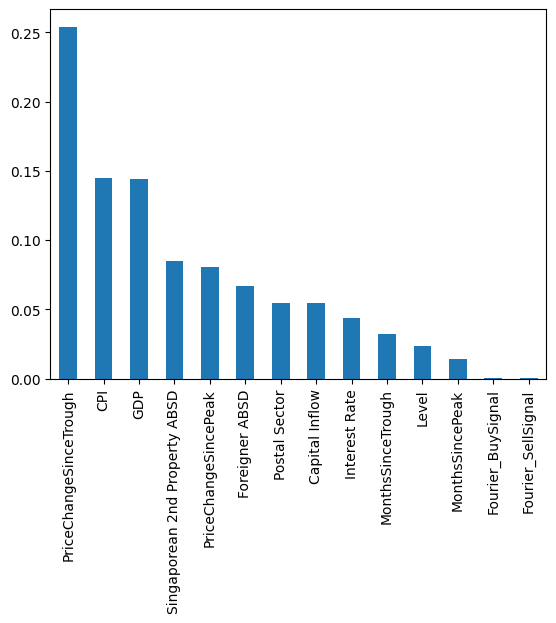

In [76]:
# Calculate Importance
importances = RF.feature_importances_
forest_importance = pd.Series(importances, index = X_train.columns)
forest_importance = forest_importance.sort_values(ascending = False)
forest_importance.plot.bar()

In [78]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train)
Score_NB_train = gnb.score(X_train,y_train)
Score_NB_test = gnb.score(X_test,y_test)
print('Training R score of Naive Bayes', Score_NB_train)
print('Testing R score of Naive Bayes', Score_NB_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training R score of Naive Bayes 0.5355915562101129
Testing R score of Naive Bayes 0.056862745098039215


In [79]:
# Gradient Boosted Tree
GB = GradientBoostingRegressor(n_estimators= 500, random_state = 0, max_features='sqrt', learning_rate= 0.01, max_depth = 10)
GB.fit(X_train, y_train)
Score_GB_train = GB.score(X_train,y_train)
Score_GB_test = GB.score(X_test,y_test)
print('Training R score of Gradient Boosted Tree', Score_GB_train)
print('Testing R score of Gradient Boosted Tree', Score_GB_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training R score of Gradient Boosted Tree 0.993256472945904
Testing R score of Gradient Boosted Tree 0.9486606710296973


In [82]:
# SVM (poly)
svm1 = svm.SVR(kernel = 'poly', C = 1.0)
svm1.fit(X_train, y_train)
Score_SVM1_train = svm1.score(X_train,y_train)
Score_SVM1_test = svm1.score(X_test,y_test)
print('Training R score of SVM (poly)', Score_SVM1_train)
print('Testing R score of SVM (poly)', Score_SVM1_test)
# SVM (Gaussian)
svm2 = svm.SVR(kernel = 'rbf', C = 1.0, gamma = 'scale')
svm2.fit(X_train, y_train)
Score_SVM2_train = svm2.score(X_train,y_train)
Score_SVM2_test = svm2.score(X_test,y_test)
print('Training R score of SVM (Gaussian)', Score_SVM2_train)
print('Testing R score of SVM (Gaussian)', Score_SVM2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training R score of SVM (poly) 0.12101952538669247
Testing R score of SVM (poly) 0.12488924132895962


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training R score of SVM (Gaussian) 0.04605758554654826
Testing R score of SVM (Gaussian) 0.04950696168968627


In [108]:
# Neural Network
NN = tf.keras.models.Sequential()
NN.add(tf.keras.layers.Dense(units = 4, activation = 'linear'))
NN.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
NN.compile(optimizer = 'adam', loss = 'mean_absolute_error')
result = NN.fit(X_train, y_train, batch_size = 50, epochs = 500)

Epoch 1/500
41/41 [==============================] - 2s 5ms/step - loss: 1936.3430
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 1931.0140
Epoch 3/500
41/41 [==============================] - 0s 5ms/step - loss: 1925.1671
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 1918.2230
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 1909.7937
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 1899.6001
Epoch 7/500
41/41 [==============================] - 0s 4ms/step - loss: 1887.4735
Epoch 8/500
41/41 [==============================] - 0s 4ms/step - loss: 1873.3506
Epoch 9/500
41/41 [==============================] - 0s 5ms/step - loss: 1857.2324
Epoch 10/500
41/41 [==============================] - 0s 4ms/step - loss: 1839.1422
Epoch 11/500
41/41 [==============================] - 0s 5ms/step - loss: 1819.0791
Epoch 12/500
41/41 [==============================] - 0s 5ms/step - loss: 1797.1331
E

In [107]:
y_train_pred = NN.predict(X_train)
y_test_pred = NN.predict(X_test)
r2_value_train = r2_score(y_train, y_train_pred)
r2_value_test = r2_score(y_test, y_test_pred)
print(f'R2 Score on training data: {r2_value_train}')
print(f'R2 Score on testing data: {r2_value_test}')

16/16 [==============================] - 0s 2ms/step
R2 Score on training data: -0.6329668345504864
R2 Score on testing data: -0.6449976749487611


In [109]:
print('Training R score of linear regression', Score_linear_train)
print('Testing R score of linear regression', Score_linear_test)
print('Training R score of Ridge', Score_Ridge_train)
print('Testing R score of Ridge', Score_Ridge_test)
print('Training R score of Lasso', Score_Lasso_train)
print('Testing R score of Lasso', Score_Lasso_test)
print('Training R score of Random Forest', Score_RF_train)
print('Testing R score of Random Forest', Score_RF_test)
print('Training R score of Naive Bayes', Score_NB_train)
print('Testing R score of Naive Bayes', Score_NB_test)
print('Training R score of Gradient Boosted Tree', Score_GB_train)
print('Testing R score of Gradient Boosted Tree', Score_GB_test)
print('Training R score of SVM (poly)', Score_SVM1_train)
print('Testing R score of SVM (poly)', Score_SVM1_test)
print('Training R score of SVM (Gaussian)', Score_SVM2_train)
print('Testing R score of SVM (Gaussian)', Score_SVM2_test)
print(f'R2 Score on training data: {r2_value_train}')
print(f'R2 Score on testing data: {r2_value_test}')

Training R score of linear regression 0.9495099263047431
Testing R score of linear regression 0.9431045004396624
Training R score of Ridge 0.9482670829902323
Testing R score of Ridge 0.9411453604157686
Training R score of Lasso 0.9489646290253683
Testing R score of Lasso 0.942279190662953
Training R score of Random Forest 0.976825621250435
Testing R score of Random Forest 0.9451305091203827
Training R score of Naive Bayes 0.5355915562101129
Testing R score of Naive Bayes 0.056862745098039215
Training R score of Gradient Boosted Tree 0.993256472945904
Testing R score of Gradient Boosted Tree 0.9486606710296973
Training R score of SVM (poly) 0.12101952538669247
Testing R score of SVM (poly) 0.12488924132895962
Training R score of SVM (Gaussian) 0.04605758554654826
Testing R score of SVM (Gaussian) 0.04950696168968627
R2 Score on training data: -0.6329668345504864
R2 Score on testing data: -0.6449976749487611


In [ ]:
# Calculate the largest common division
# numbers = fft_1st['DaysPerCycle'].nlargest(10).values
# gcd_pairs = []
# for i in range(len(numbers)):
#     for j in range(i + 1, len(numbers)):
#         gcd_result = math.gcd(numbers[i], numbers[j])
#         gcd_pairs.append(gcd_result)

In [ ]:
# from collections import Counter
# # Count occurrences of all unique values
# value_counts = Counter(gcd_pairs)

# # Display the result
# for value, count in value_counts.items():
#     print(f"The value {value} occurs {count} times in the list.")